In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression


## Training Data

In [96]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


df

In [97]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

**Correlation**

Check the relationships between each independent variable and the dependent variable using scatterplots and correlations.


Text(0, 0.5, 'FloodProbability')

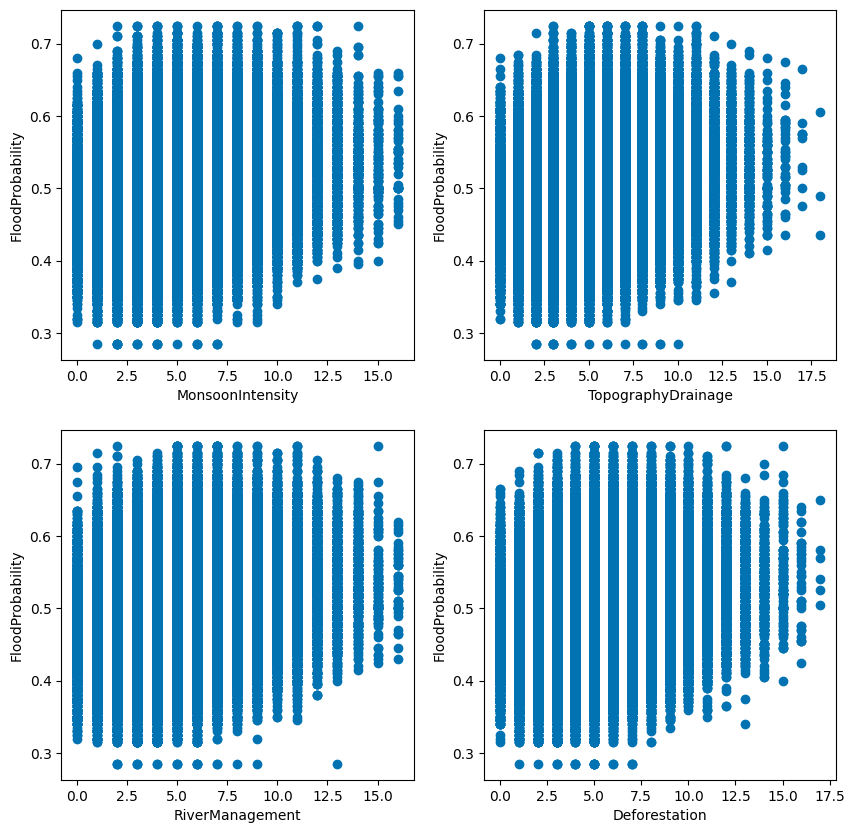

In [98]:
_, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(traindata['MonsoonIntensity'], traindata['FloodProbability'])
axs[0, 0].set_xlabel('MonsoonIntensity')
axs[0, 0].set_ylabel('FloodProbability')

axs[0, 1].scatter(traindata['TopographyDrainage'], traindata['FloodProbability'])
axs[0, 1].set_xlabel('TopographyDrainage')
axs[0, 1].set_ylabel('FloodProbability')

axs[1, 0].scatter(traindata['RiverManagement'], traindata['FloodProbability'])
axs[1, 0].set_xlabel('RiverManagement')
axs[1, 0].set_ylabel('FloodProbability')

axs[1, 1].scatter(traindata['Deforestation'], traindata['FloodProbability'])
axs[1, 1].set_xlabel('Deforestation')
axs[1, 1].set_ylabel('FloodProbability')

Text(0, 0.5, 'FloodProbability')

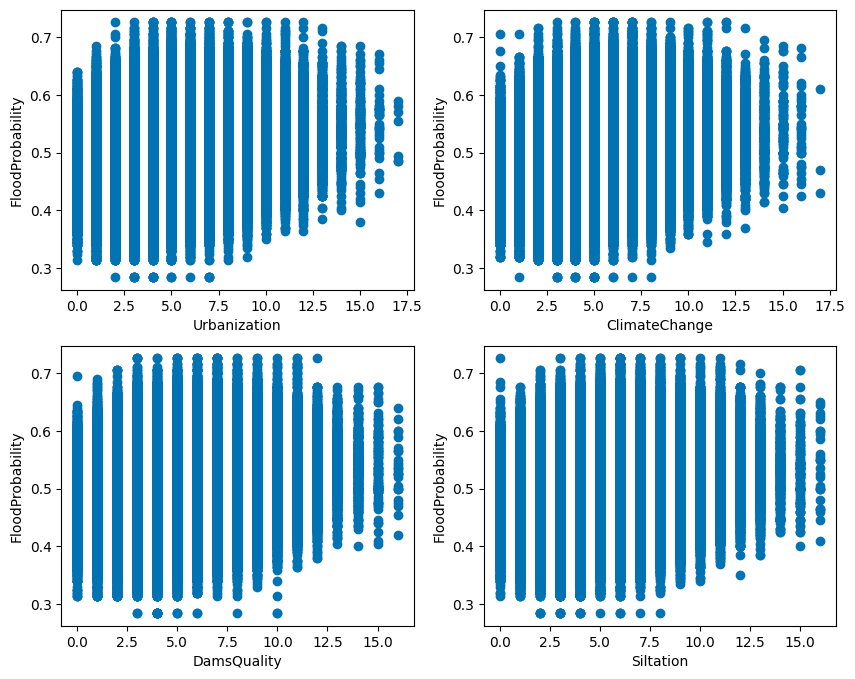

In [99]:
_, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(traindata['Urbanization'], traindata['FloodProbability'])
axs[0, 0].set_xlabel('Urbanization')
axs[0, 0].set_ylabel('FloodProbability')

axs[0, 1].scatter(traindata['ClimateChange'], traindata['FloodProbability'])
axs[0, 1].set_xlabel('ClimateChange')
axs[0, 1].set_ylabel('FloodProbability')

axs[1, 0].scatter(traindata['DamsQuality'], traindata['FloodProbability'])
axs[1, 0].set_xlabel('DamsQuality')
axs[1, 0].set_ylabel('FloodProbability')

axs[1, 1].scatter(traindata['Siltation'], traindata['FloodProbability'])
axs[1, 1].set_xlabel('Siltation')
axs[1, 1].set_ylabel('FloodProbability')

Text(0, 0.5, 'FloodProbability')

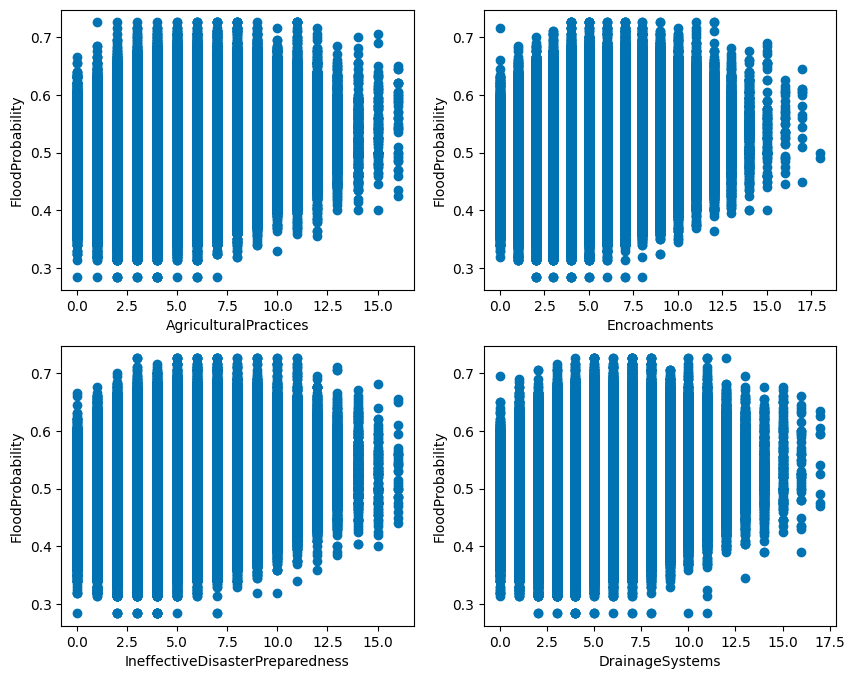

In [100]:
_, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(traindata['AgriculturalPractices'], traindata['FloodProbability'])
axs[0, 0].set_xlabel('AgriculturalPractices')
axs[0, 0].set_ylabel('FloodProbability')

axs[0, 1].scatter(traindata['Encroachments'], traindata['FloodProbability'])
axs[0, 1].set_xlabel('Encroachments')
axs[0, 1].set_ylabel('FloodProbability')

axs[1, 0].scatter(traindata['IneffectiveDisasterPreparedness'], traindata['FloodProbability'])
axs[1, 0].set_xlabel('IneffectiveDisasterPreparedness')
axs[1, 0].set_ylabel('FloodProbability')

axs[1, 1].scatter(traindata['DrainageSystems'], traindata['FloodProbability'])
axs[1, 1].set_xlabel('DrainageSystems')
axs[1, 1].set_ylabel('FloodProbability')

Text(0, 0.5, 'FloodProbability')

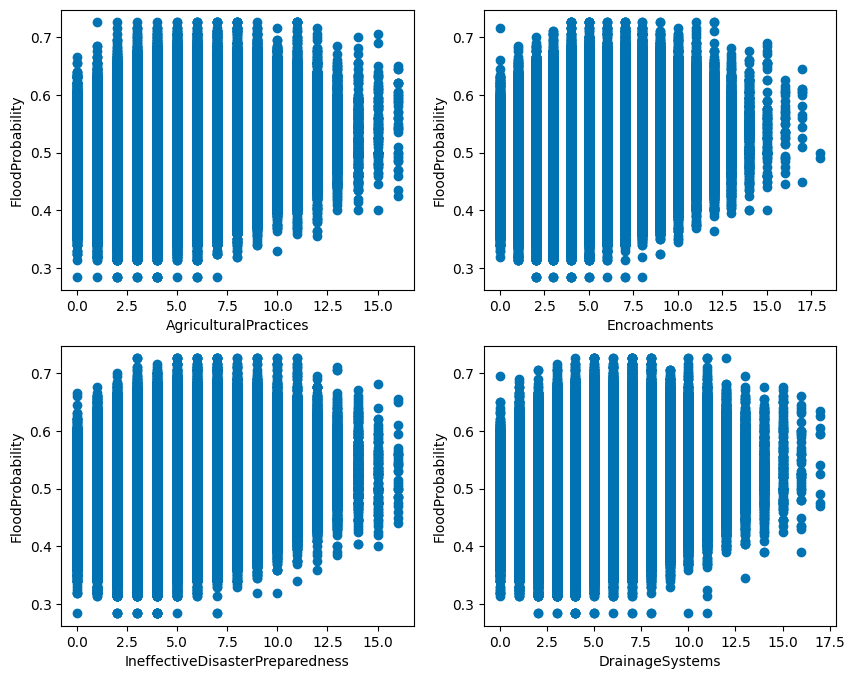

In [101]:
_, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(traindata['AgriculturalPractices'], traindata['FloodProbability'])
axs[0, 0].set_xlabel('AgriculturalPractices')
axs[0, 0].set_ylabel('FloodProbability')

axs[0, 1].scatter(traindata['Encroachments'], traindata['FloodProbability'])
axs[0, 1].set_xlabel('Encroachments')
axs[0, 1].set_ylabel('FloodProbability')

axs[1, 0].scatter(traindata['IneffectiveDisasterPreparedness'], traindata['FloodProbability'])
axs[1, 0].set_xlabel('IneffectiveDisasterPreparedness')
axs[1, 0].set_ylabel('FloodProbability')

axs[1, 1].scatter(traindata['DrainageSystems'], traindata['FloodProbability'])
axs[1, 1].set_xlabel('DrainageSystems')
axs[1, 1].set_ylabel('FloodProbability')

In [102]:
ind_vars = ["MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Deforestation", "Urbanization", "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices", "Encroachments", "IneffectiveDisasterPreparedness", "DrainageSystems", "CoastalVulnerability", "Landslides", "Watersheds", "DeterioratingInfrastructure", "PopulationScore", "WetlandLoss", "InadequatePlanning", "PoliticalFactors"]

for var in ind_vars:
    res = pearsonr(traindata[var], traindata['FloodProbability'])
    print(f"correlation coef: {res[0]}")
    print(f"p-value: {res[1]}\n")

correlation coef: 0.18909829231500214
p-value: 0.0

correlation coef: 0.18763504566957656
p-value: 0.0

correlation coef: 0.1871306450726629
p-value: 0.0

correlation coef: 0.1840009162515054
p-value: 0.0

correlation coef: 0.18086050730243625
p-value: 0.0

correlation coef: 0.18476149035819184
p-value: 0.0

correlation coef: 0.1879961491439414
p-value: 0.0

correlation coef: 0.18678927218263994
p-value: 0.0

correlation coef: 0.1833656526594234
p-value: 0.0

correlation coef: 0.1788407684001982
p-value: 0.0

correlation coef: 0.18310869818606623
p-value: 0.0

correlation coef: 0.17930491217347422
p-value: 0.0

correlation coef: 0.1777743884098259
p-value: 0.0

correlation coef: 0.18534606387901742
p-value: 0.0

correlation coef: 0.18190650150827625
p-value: 0.0

correlation coef: 0.19000695837003423
p-value: 0.0

correlation coef: 0.18588969827329405
p-value: 0.0

correlation coef: 0.1833964161775524
p-value: 0.0

correlation coef: 0.1809676796455153
p-value: 0.0

correlation coef: 0.

In [103]:
correlation = traindata.corr()
correlation

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.000093,-0.001518,-0.000413,-0.000080,0.000580,-0.000188,0.000133,0.000281,-0.000103,...,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
MonsoonIntensity,-0.000093,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.001518,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.000413,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.000080,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,0.000580,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.000188,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,0.000133,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,0.000281,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.000103,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366


**Create Correlation Matrix**

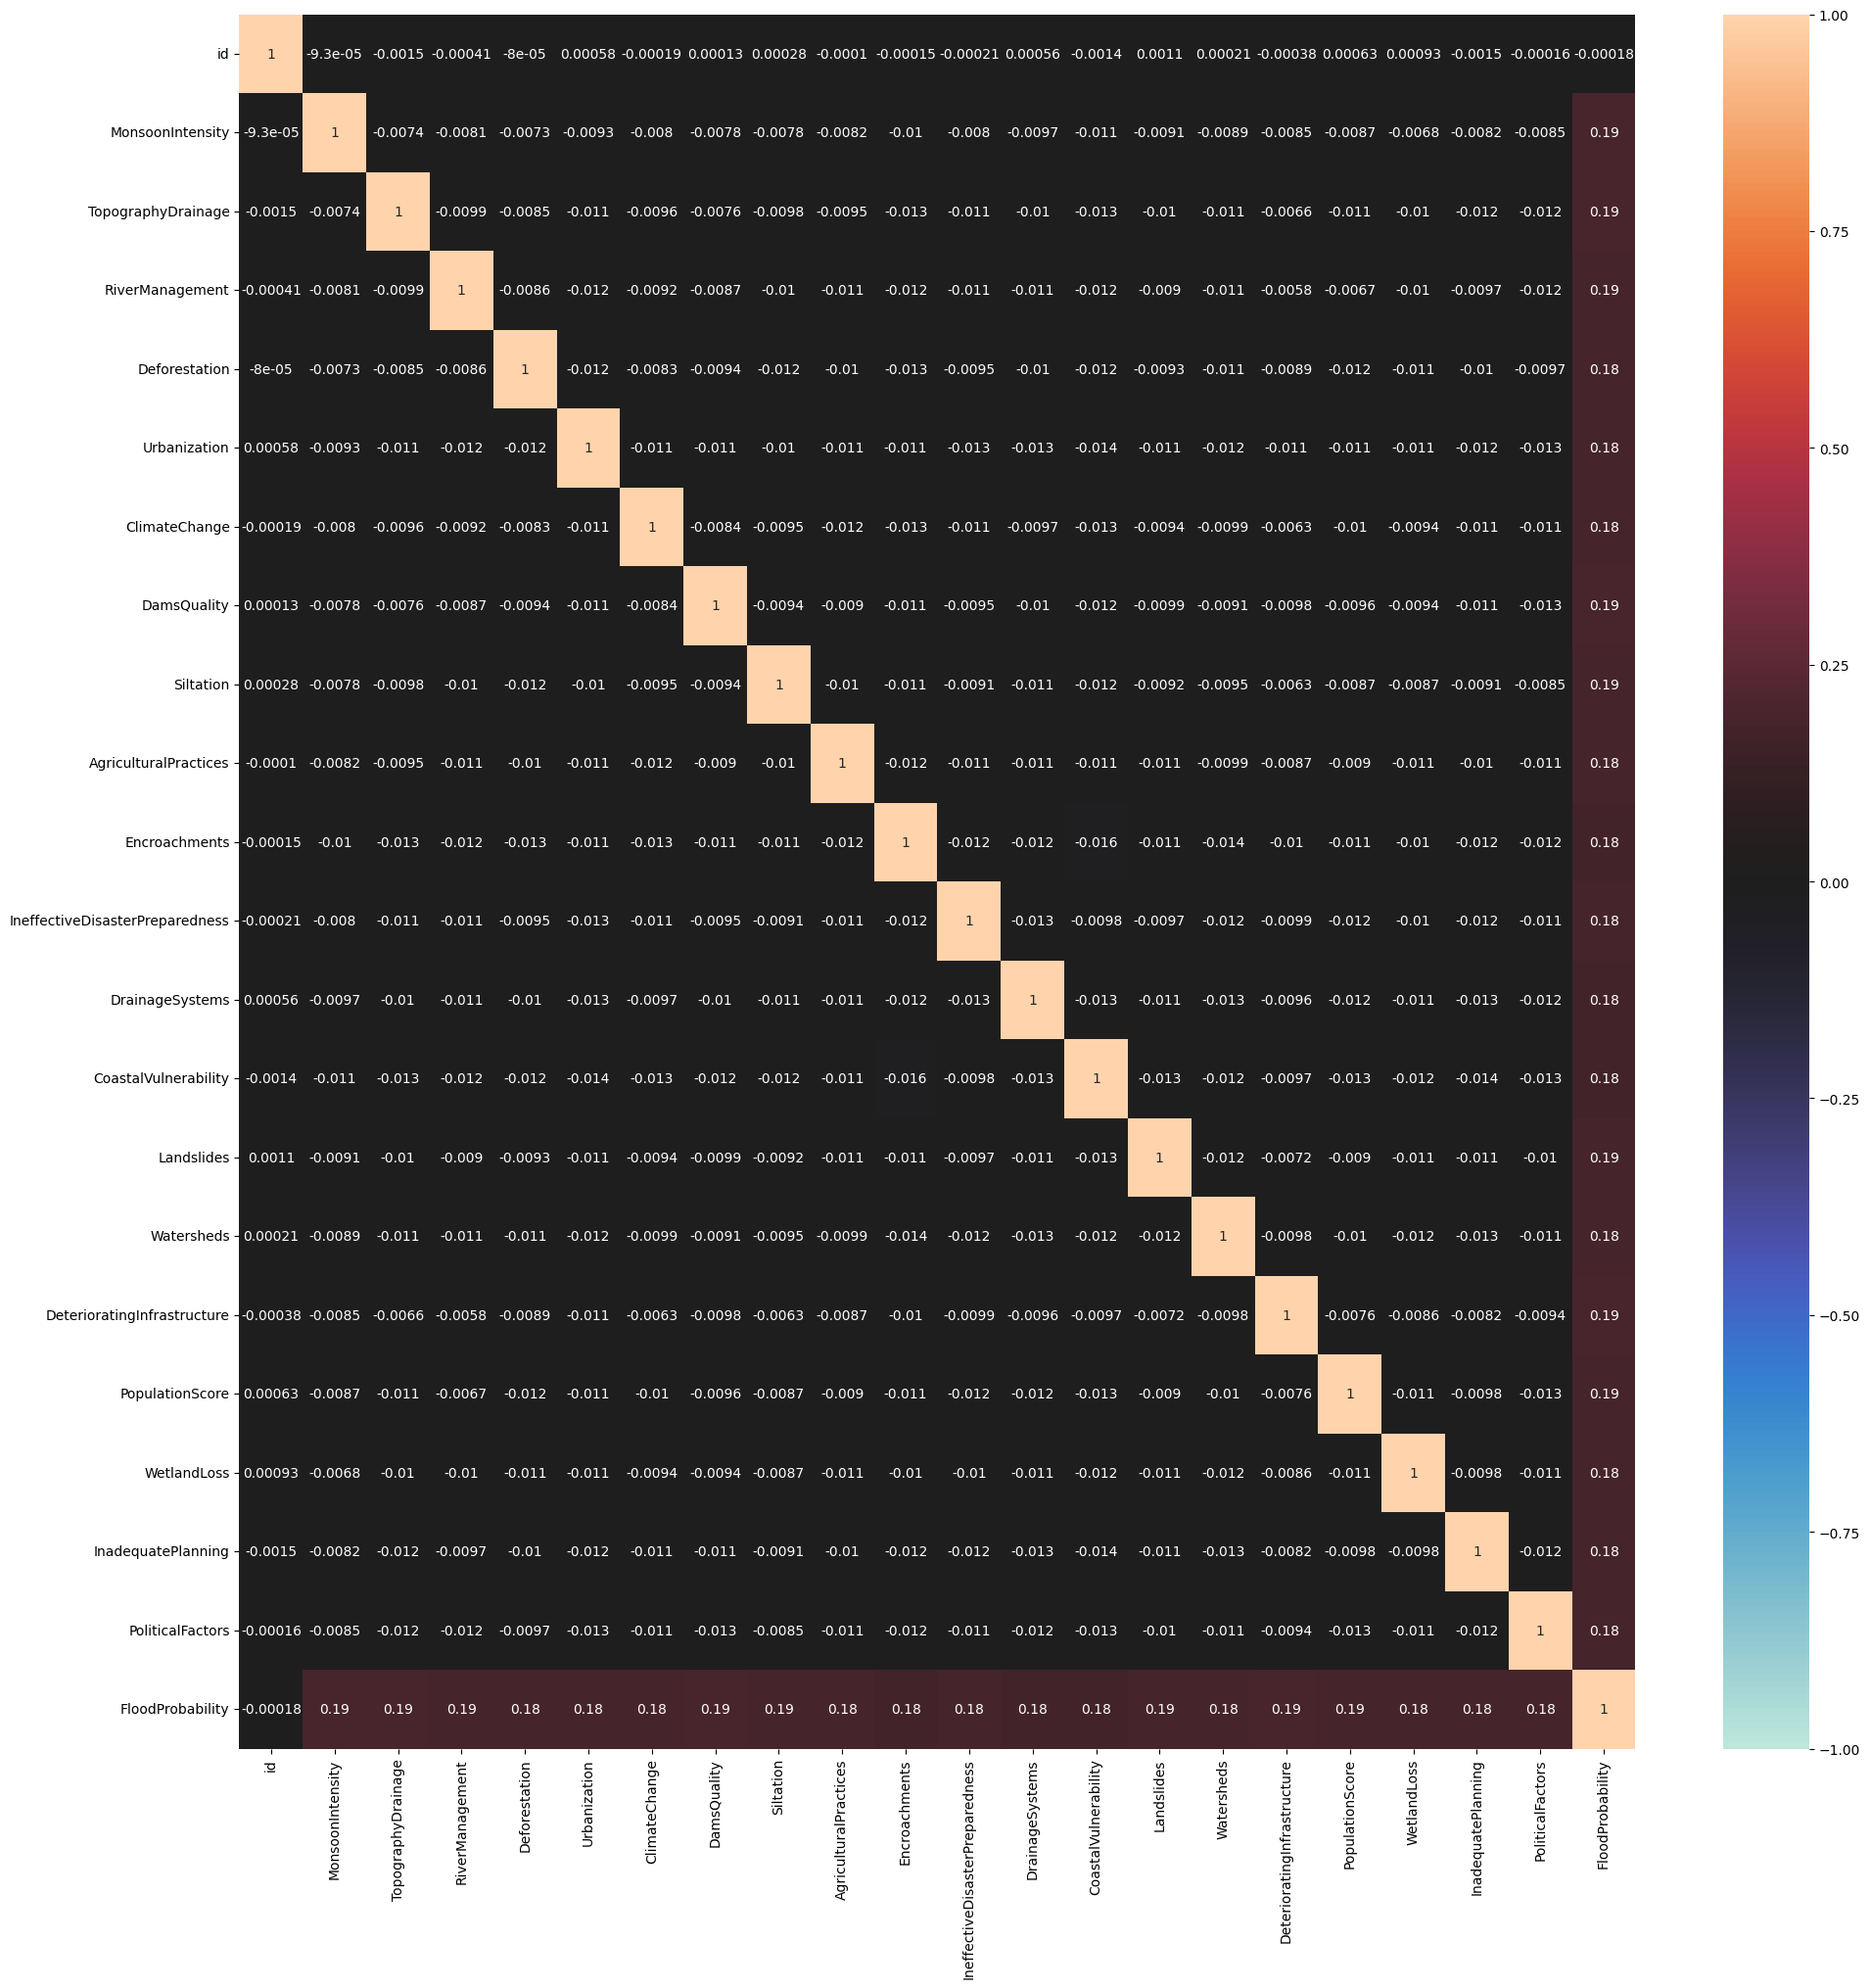

In [104]:
plt.figure(figsize=(23, 23))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

**Building Different Regression Models**

First best model (including all independend variables)

Set dependent and independent variables

In [122]:
X = traindata[ind_vars]
X = sm.add_constant(X)
y = traindata['FloodProbability']

Build and train model


In [106]:
mlr_model = LinearRegression()
mlr_model.fit(X, y)

LinearRegression()

In [107]:
y_pred = mlr_model.predict(X)

Display statistical summary

In [108]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:38:46   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0533      0.000   -234.995      0.000      -0.054      -0.053
MonsoonIntensity                    0.0056   9.25e-06    606.734      0.000       0.006       0.006
TopographyDrainage                  0.0056   9.09e-06    621.525      0.000       0.006       0.006
RiverManagement                     0.0057   9.18e-06    617.178      0.000       0.006       0.006
Deforestation                       0.0057   9.27e-06    612.404      0.000       0.006       0.006
Urbanization                        0.0057   9.14e-06    619.319      0.000       0.006       0.006
ClimateChange                       0.0057   9.25e-06    612.437      0.000       0.006       0.006
DamsQuality                         0.0057   9.13e-06    619.170      0.000       0.006       0.006
Siltation                           0.0056   9.21e-06    612.284      0.000       0.006       0.006
AgriculturalPractices               0.0056    9.2e-06    612.643      0.000       0.006       0.006
Encroachments                       0.0056   9.14e-06    618.374      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   9.16e-06    615.995      0.000       0.006       0.006
DrainageSystems                     0.0056   9.18e-06    613.641      0.000       0.006       0.006
CoastalVulnerability                0.0057   9.11e-06    622.228      0.000       0.006       0.006
Landslides                          0.0056   9.15e-06    616.245      0.000       0.006       0.006
Watersheds                          0.0056   9.14e-06    617.853      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   9.21e-06    609.647      0.000       0.006       0.006
PopulationScore                     0.0057   9.17e-06    618.914      0.000       0.006       0.006
WetlandLoss                         0.0056    9.2e-06    612.654      0.000       0.006       0.006
InadequatePlanning                  0.0056   9.14e-06    613.363      0.000       0.006       0.006
PoliticalFactors                    0.0056    9.1e-06    620.512      0.000       0.006       0.006
==============================================================================
Omnibus:                   100155.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148528.907
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualize residuals

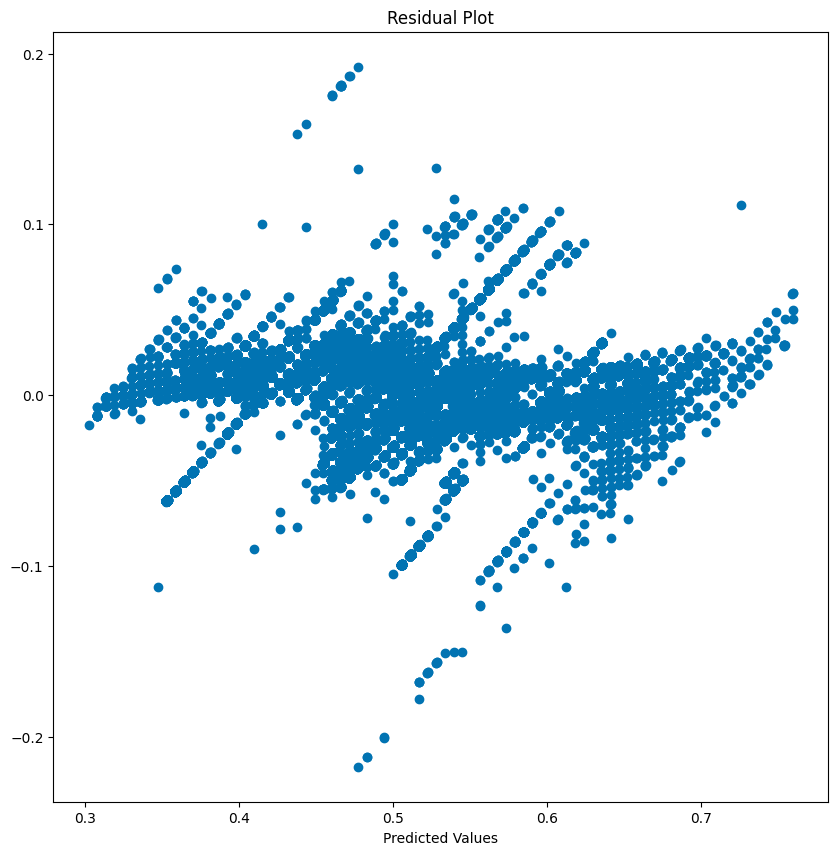

In [109]:
plt.figure(figsize=(10, 10))
plt.scatter(y_pred, y_pred - y)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('')
plt.show()

Fitted vs. Actual

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

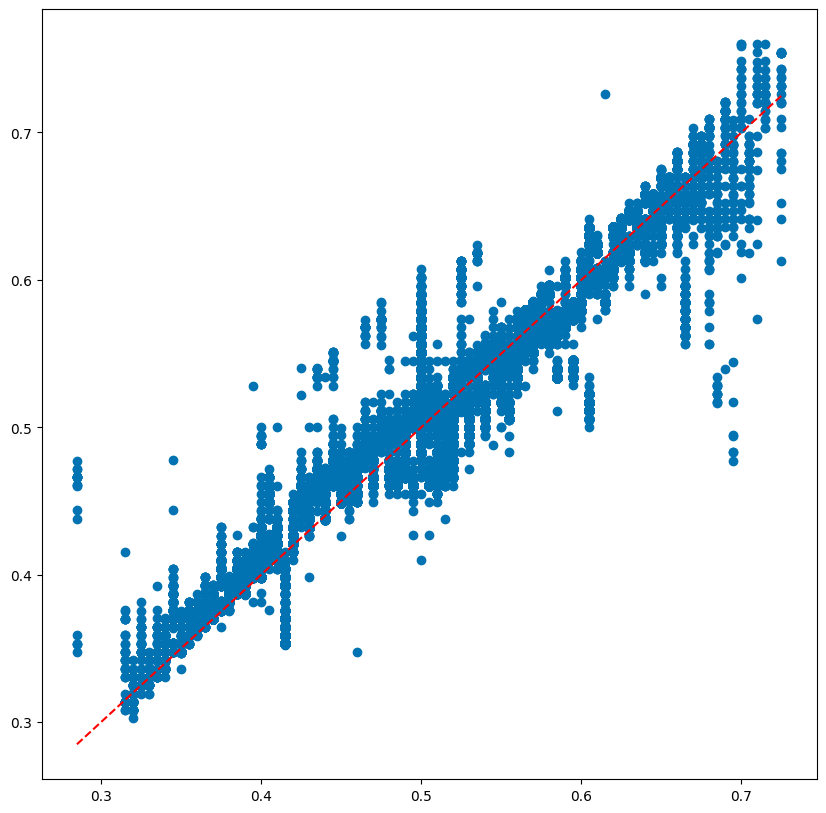

In [110]:
plt.figure(figsize=(10, 10))
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt

**Observation and findings**

Looking at the correlation matrix, the each independent variable has 0.18-0.19 correlation coefficient. I personally tried all variables first because it is obvious for me that it all would at least have some positive correlation  

Trying to create another model. I removed some of the independent variables that i personally think that doesn't have that much of a correlation to the dependent variable.

Setup dependent and independent variables


In [111]:
ind_vars = ["TopographyDrainage", "RiverManagement", "Deforestation", "Urbanization", "DamsQuality", "Siltation", "IneffectiveDisasterPreparedness", "DrainageSystems", "CoastalVulnerability", "Watersheds", "DeterioratingInfrastructure", "PopulationScore", "InadequatePlanning", "PoliticalFactors"]


for var in ind_vars:
    res = pearsonr(traindata[var], traindata['FloodProbability'])
    print(f"correlation coef: {res[0]}")
    print(f"p-value: {res[1]}\n")


correlation coef: 0.18763504566957656
p-value: 0.0

correlation coef: 0.1871306450726629
p-value: 0.0

correlation coef: 0.1840009162515054
p-value: 0.0

correlation coef: 0.18086050730243625
p-value: 0.0

correlation coef: 0.1879961491439414
p-value: 0.0

correlation coef: 0.18678927218263994
p-value: 0.0

correlation coef: 0.18310869818606623
p-value: 0.0

correlation coef: 0.17930491217347422
p-value: 0.0

correlation coef: 0.1777743884098259
p-value: 0.0

correlation coef: 0.18190650150827625
p-value: 0.0

correlation coef: 0.19000695837003423
p-value: 0.0

correlation coef: 0.18588969827329405
p-value: 0.0

correlation coef: 0.1809676796455153
p-value: 0.0

correlation coef: 0.18241694473283035
p-value: 0.0



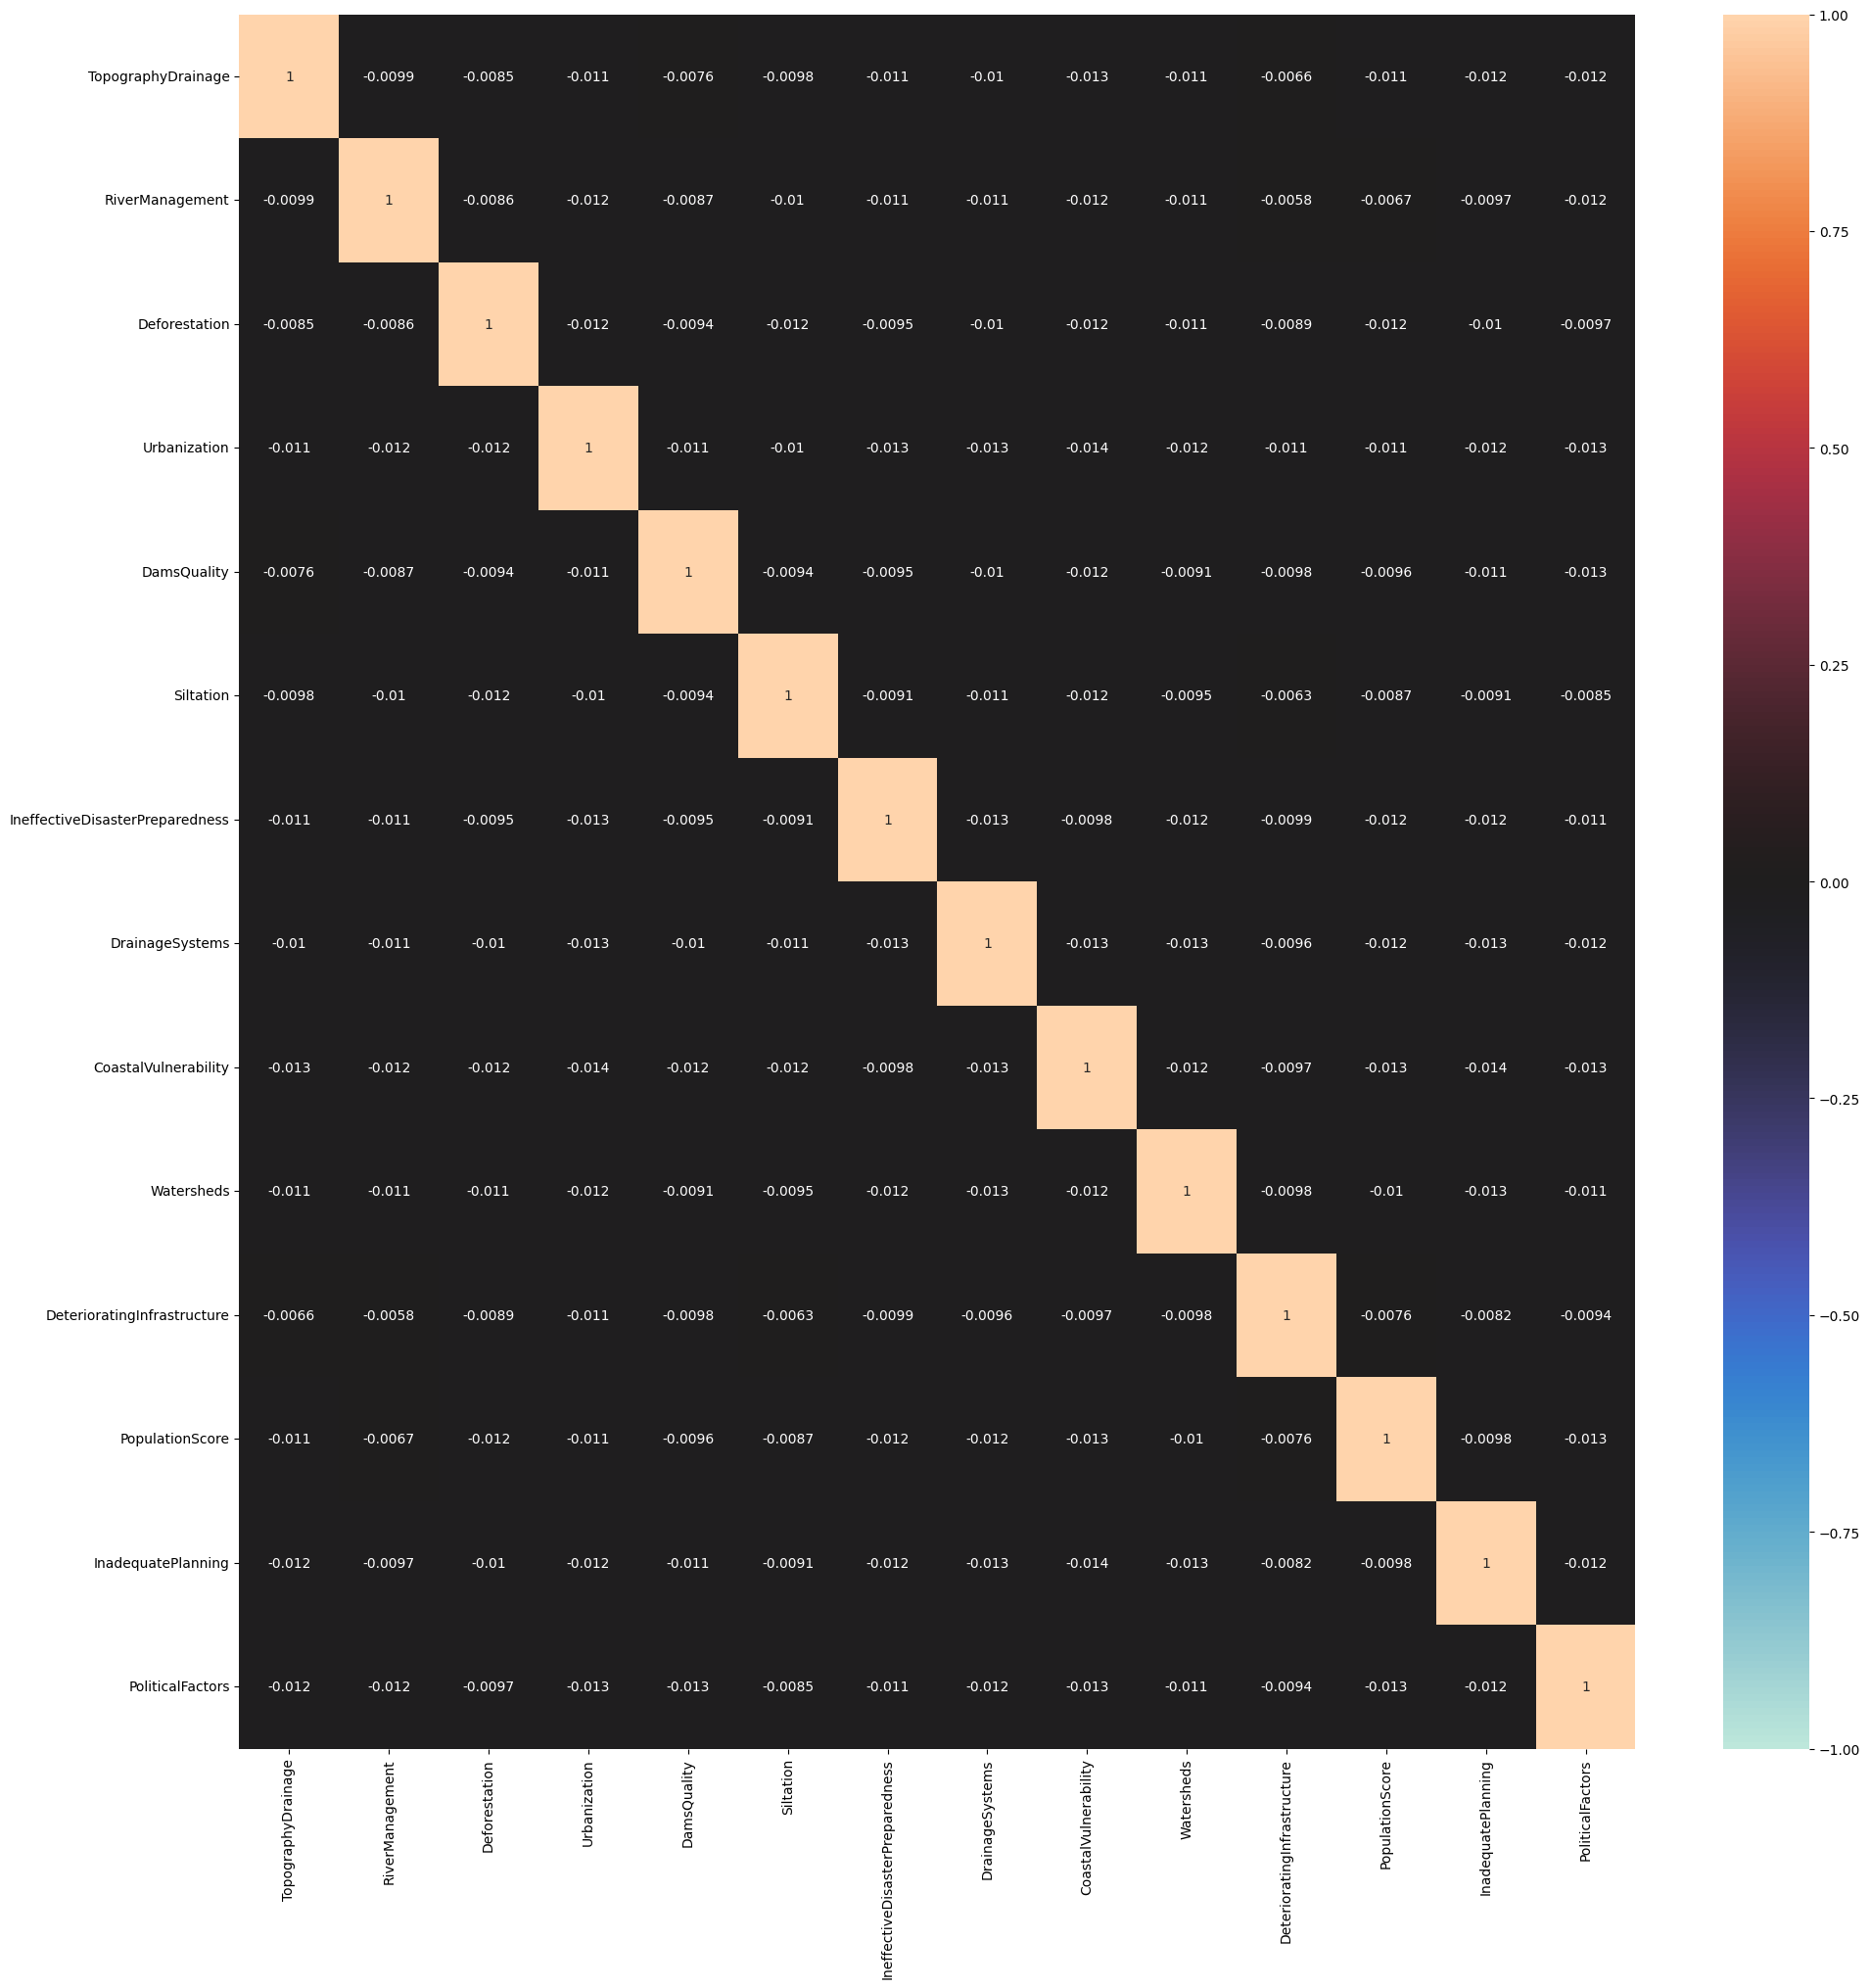

In [112]:
plt.figure(figsize=(23, 23))

test = traindata[ind_vars]
sns.heatmap(test.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [116]:
X = traindata[ind_vars]
X = sm.add_constant(X)
y = traindata['FloodProbability']

mlr_model_new = LinearRegression()
mlr_model_new.fit(X, y)

y_pred = mlr_model_new.predict(X)

olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                 9.778e+04
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        06:41:55   Log-Likelihood:             2.1870e+06
No. Observations:             1117957   AIC:                        -4.374e+06
Df Residuals:                 1117942   BIC:                        -4.374e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1415      0.000    453.453      0.000       0.141       0.142
TopographyDrainage                  0.0053   1.55e-05    340.133      0.000       0.005       0.005
RiverManagement                     0.0053   1.56e-05    338.069      0.000       0.005       0.005
Deforestation                       0.0053   1.58e-05    335.062      0.000       0.005       0.005
Urbanization                        0.0052   1.55e-05    337.041      0.000       0.005       0.005
DamsQuality                         0.0053   1.55e-05    340.365      0.000       0.005       0.005
Siltation                           0.0053   1.57e-05    336.306      0.000       0.005       0.005
IneffectiveDisasterPreparedness     0.0052   1.56e-05    335.851      0.000       0.005       0.005
DrainageSystems                     0.0052   1.56e-05    333.382      0.000       0.005       0.005
CoastalVulnerability                0.0052   1.55e-05    334.059      0.000       0.005       0.005
Watersheds                          0.0052   1.56e-05    335.270      0.000       0.005       0.005
DeterioratingInfrastructure         0.0053   1.57e-05    337.265      0.000       0.005       0.005
PopulationScore                     0.0053   1.56e-05    338.910      0.000       0.005       0.005
InadequatePlanning                  0.0052   1.56e-05    334.118      0.000       0.005       0.005
PoliticalFactors                    0.0052   1.55e-05    337.617      0.000       0.005       0.005
==============================================================================
Omnibus:                     1169.230   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1120.096
Skew:                           0.059   Prob(JB):                    5.95e-244
Kurtosis:                       2.900   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Test File

In [114]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

## Sample Submission File

In [121]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
samplefile = pd.read_csv(sample_submission_url)

# Store the test ids
test_ids = testdata['id']

# Prepare the test data for prediction - remove 'id' and add constant
X_test = testdata.drop('id', axis=1)
X_test = sm.add_constant(X_test)

# Ensure the order of columns in X_test matches the order in which the model was trained (X)
X_test = X_test[X.columns]

y_pred = mlr_model.predict(X_test)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': test_ids,
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
